In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
df.columns.tolist()

['Unnamed: 0',
 'year',
 'month',
 'interest_rate',
 'unemployment_rate',
 'index_price']

In [13]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [14]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [18]:
df.isnull().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

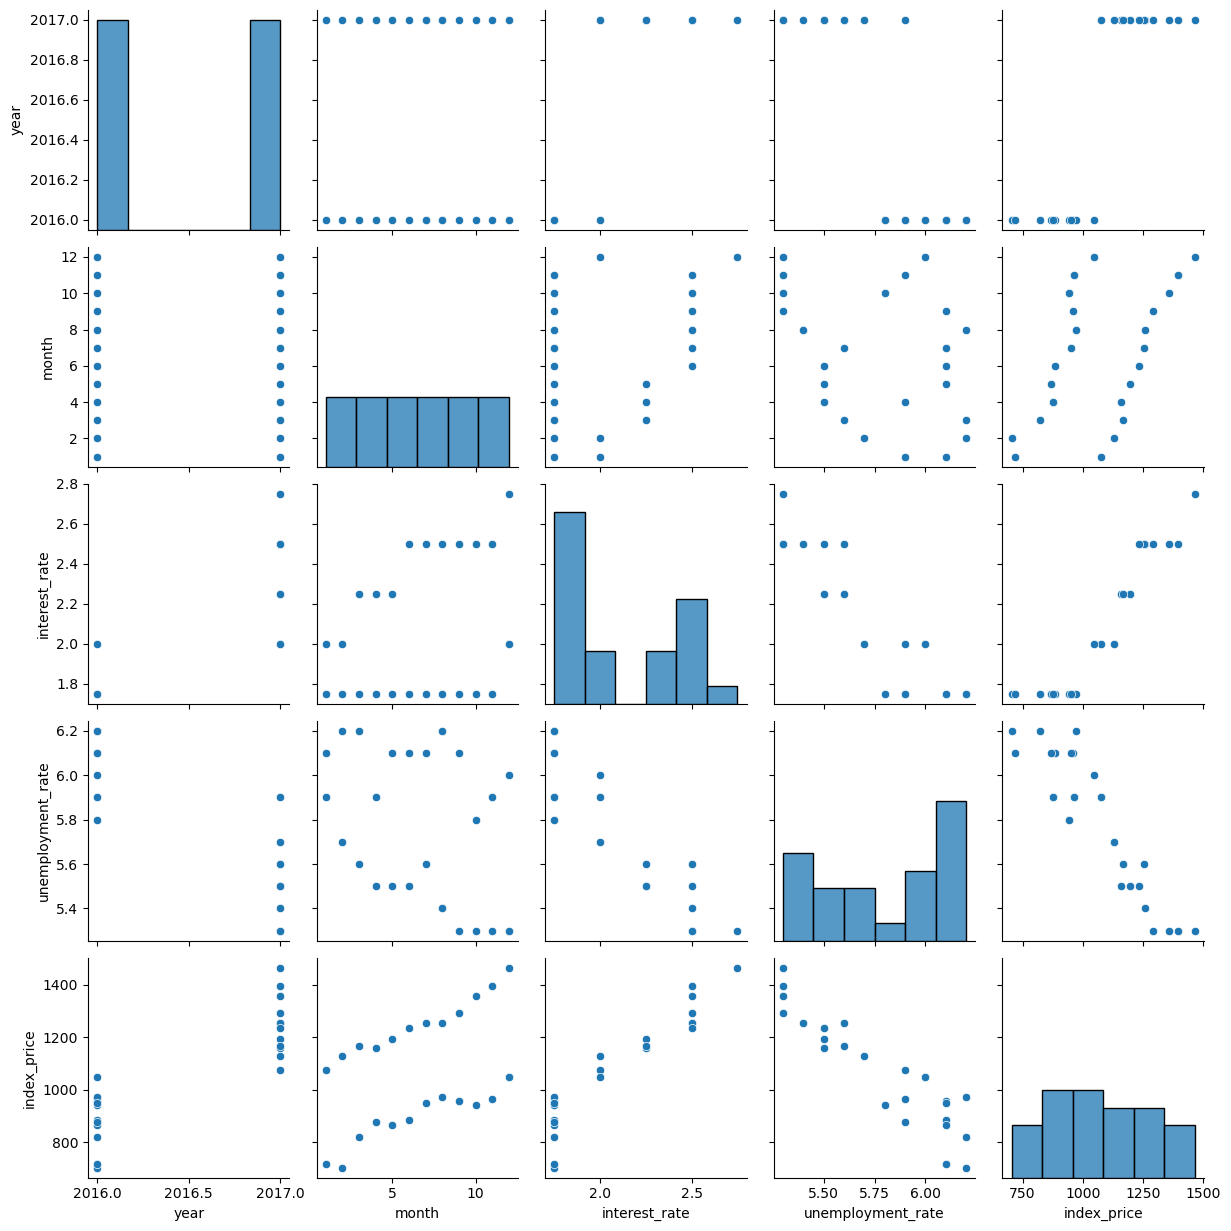

In [19]:
import seaborn as sns
sns.pairplot(df)

In [20]:
df.corr()

,year,month,interest_rate,unemployment_rate,index_price
year,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


In [22]:
df.drop(columns=["year","month"], axis=1, inplace=True)

In [23]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


Text(0, 0.5, 'unemployment rate')

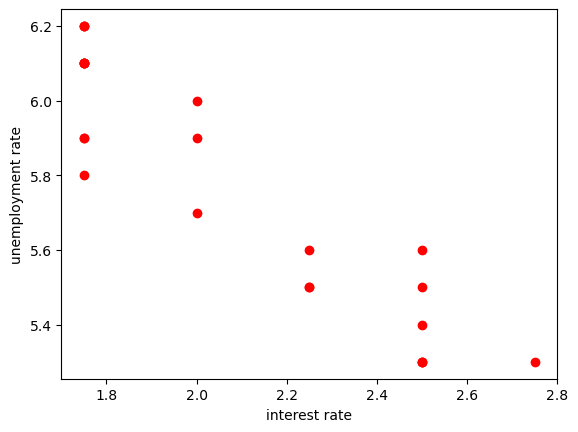

In [27]:
plt.scatter(df['interest_rate'],df['unemployment_rate'], color='r')
plt.xlabel("interest rate")
plt.ylabel("unemployment rate")

In [28]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [35]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [36]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [37]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
X_test

array([[ 0.35355339, -0.6882472 ],
       [-1.06066017,  1.45296631],
       [ 1.76776695, -1.30002249],
       [-1.06066017,  1.14707867],
       [-0.35355339,  0.53530338],
       [ 0.35355339, -0.38235956],
       [-1.06066017,  0.53530338],
       [ 1.06066017, -1.30002249]])

In [45]:
X_train

array([[-0.89073374,  1.25707872],
       [ 1.35954097, -0.62853936],
       [ 1.35954097, -1.5713484 ],
       [-0.14064217,  0.62853936],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -1.5713484 ],
       [ 1.35954097, -1.25707872],
       [-0.89073374,  1.25707872],
       [-0.89073374,  0.94280904],
       [-0.89073374,  0.31426968],
       [-0.89073374,  0.94280904],
       [ 0.6094494 , -0.94280904],
       [-0.14064217, -0.31426968],
       [-0.89073374,  0.        ],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -0.94280904]])

In [56]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, Y_train, scoring = "neg_mean_squared_error", cv= 3)

In [57]:
import numpy as np
np.mean(validation_score)

-8584.447029905592

In [59]:
regression.fit(X_train, Y_train)
y_predict = regression.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
score = r2_score(Y_test, y_predict)
rmse = np.sqrt(mse)
adjusted_rsqure = (1 - score)* ((len(Y_test)-1) /(len(Y_test)- X_test.shape[1]-1))

In [74]:
print(mse)
print(mae)
print(rmse)
print(score)
print(adjusted_rsqure)

11792.511387420975
97.18750000000011
108.59333030817766
0.684817433917698
0.4412555925152228


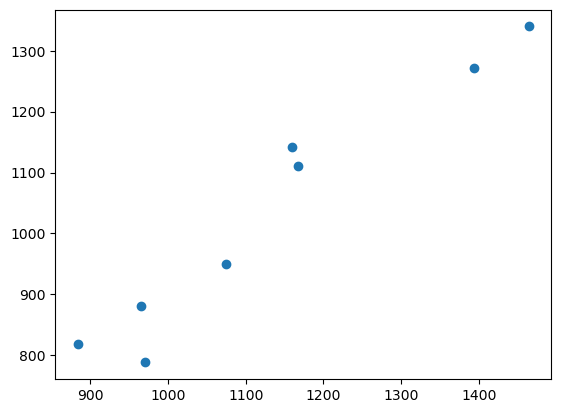

In [76]:
plt.scatter(Y_test, y_predict)

In [77]:
residuals = Y_test - y_predict
residuals

8      17.364504
16    183.018322
0     124.056104
18     64.949238
11    125.725954
9      56.433587
13     83.811071
1     122.141220
Name: index_price, dtype: float64

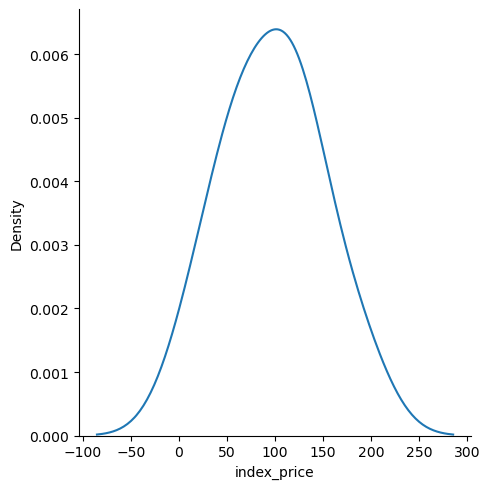

In [78]:
sns.displot(residuals, kind="kde")

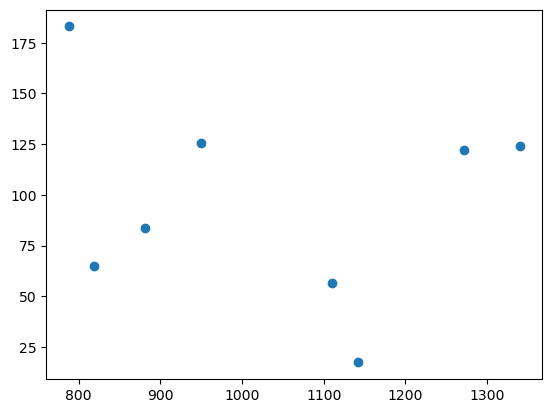

In [80]:
plt.scatter(y_predict, residuals)

In [82]:
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()

In [83]:
model.summary()

C:\Users\dipu\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.105
Method:                 Least Squares   F-statistic:                             0.2425
Date:                Tue, 25 Jun 2024   Prob (F-statistic):                       0.788
Time:                        00:14:22   Log-Likelihood:                         -133.85
No. Observations:                  16   AIC:                                      271.7
Df Residuals:                      14   BIC:                                      273.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            96.2869    682.952      0.141      0.890   -1368.500    1561.074
x2          -101.5702    682.952     -0.149      0.884   -1566.357    1363.216
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.412
Skew:                          -0.327   Prob(JB):                        0.814
Kurtosis:                       2.563   Cond. No.                         4.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
print(regression.coef_)

[  96.28689501 -101.57024663]
